# Introduction
This is a simple financial analysis of tech stocks using Python. The analysis includes:

1. **Data collection:** Loading the data from Yahoo Finance API.
2. **Descriptive statistics:** Table of descriptive statistics for the stocks and descriptive plots.
3. **Time series analysis:** A collection of statistical and computational techniques for analyzing data recorded.
4. **Risk analysis and portfolio example:** A compilation of basic metrics used in portfolio management and example of a portfolio conformation.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys
import numpy as np

module = os.path.abspath(os.path.join('..'))
if module not in sys.path:
    sys.path.append(module + '\\src')

from data_loader import *
from visualisation import *
from analysis_tools import *

In [2]:
# Stock symbol
tech_symbols = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'META', 'NVDA']

# Fetching data from yfinance
stocks = stock_data(tickers=tech_symbols)
stocks.to_csv('../data/raw/selected_stocks.csv', sep=';')

[*********************100%***********************]  6 of 6 completed


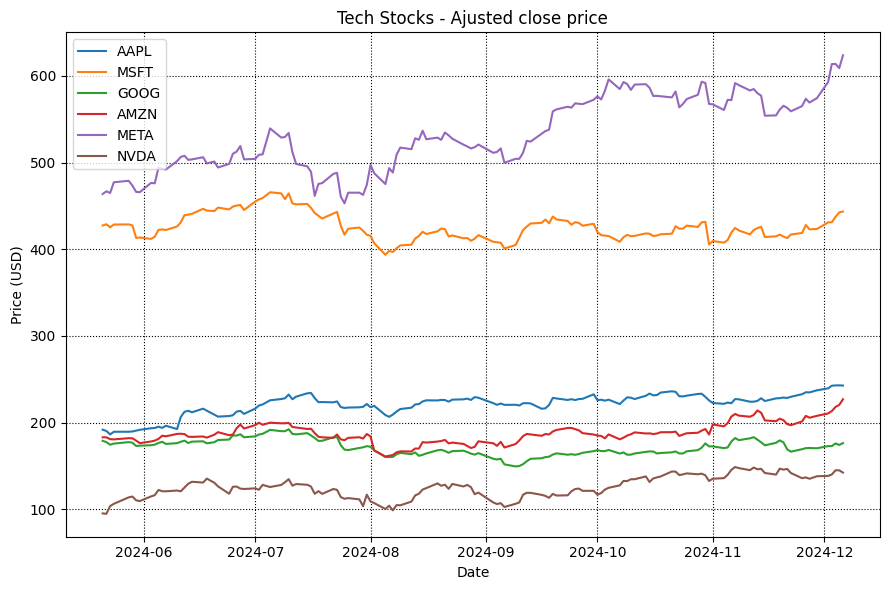

In [3]:
tracking_plot(data=stocks['Adj Close'], tickers=tech_symbols, title='Tech Stocks - Ajusted close price', xlabel='Date', ylabel='Price (USD)')

**NOTE:**

When working with time series data from the stock market, you must avoid making any analysis or modelling using the prices of the assets you're working with. We usually work with the returns for three fundamental reasons:

1. The returns provide a more comprehensive view of an investment's performance;

2. the differences among prices scales (plot above) make difficult to compare the performance of multiple assets, so returns can be comparable with each other homogenising the unit of measurement;

3. and prices always depend on the previous price, so prices usually have a unit root, while the returns are assumed to be stationary and stationary time series have a lot of convenient properties for analysis and data modelling.

For these reasons, before making any comparisons, analyses, or models using stock data, it is necessary to convert the price into return values. Then, we can extract the key calculations needed.

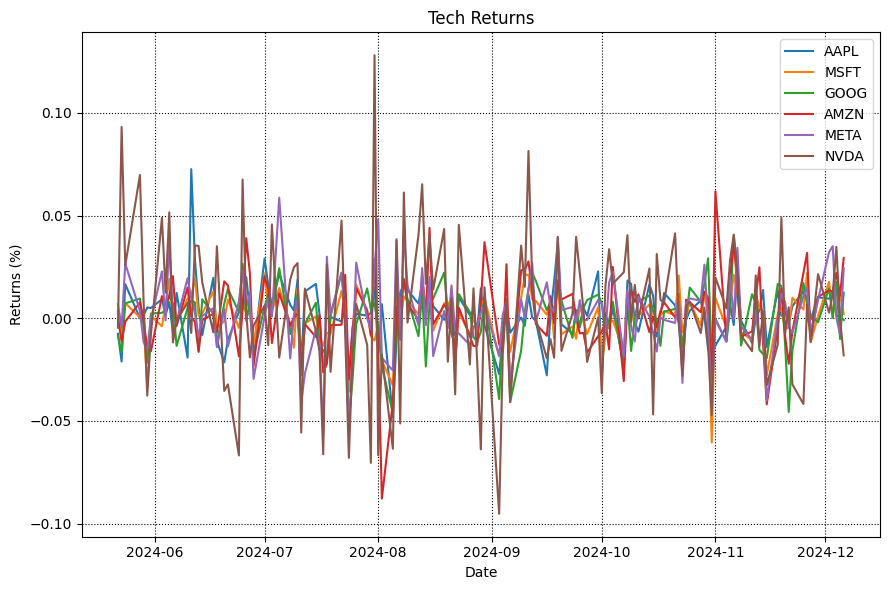

In [4]:
# Calculate and plot the return values
returns = stocks['Adj Close'].pct_change()
returns.to_csv('../data/processed/returns.csv', sep=';')

tracking_plot(data=returns, tickers=tech_symbols, title='Tech Returns', xlabel='Date', ylabel='Returns (%)')

### Descriptive statistics:

A descriptive statistic is a summary that quantitatively describes the information collected. The most common measures are: 

- **Count:** The total number of observations in the dataset.
- **Mean:** The average or "typical" return value.
- **Standard deviation:** A measure of the dispersion or variability in the returns. It is commonly used as a risk parameter.
- **Minimum (min) and maximum (max):** min is the smallest helpful value for detecting extreme drops, and max is the most significant value for detecting peaks.
- **25th Percentile (25%):** The first quartile is the value below which 25% of the returns data are, helping to understand the lower range of the returns of each stock.
- **Median (50%):** The middle value of the dataset when sorted, representing the central point of the data, unaffected by extreme values.
- **75th Percentile (75%):** This is the third quartile. The value below which 75% of the returns data are, helps to understand the upper range of the returns of each stock.
- **Skewness:** A measure of the asymmetry of the data distribution around the mean. Indicates if the data is left-skewed, symmetric, or right-skewed.
- **Kurtosis:** Indicates whether the distribution has more or fewer extreme values than a normal distribution.

These measurements help to identify trends, volatility, and potential outliers. Additionally, histograms and boxplots provide critical insights into the behaviour of financial data by approximating the results obtained by descriptive statistics, helping in the analysis process.

- **Histograms:** Histograms are used to analyse the distribution shape of the returns identifying patterns like skewness and kurtosis, and highlight how frequently extreme losses or gains occur because it is uselful for evaluating volatility.
- **Boxplots:** Boxplots are used to summarize the spread, central tendency, and outliersand it is easy to compare multiple assets' distributions side-by-side.

In [5]:
# Descriptive statistics
stats = descriptive_stats(data=returns, tickers=tech_symbols)
stats.to_csv('../data/processed/descriptive_statistics.csv', sep=';')

print(stats)

        count      mean       std       min       25%       50%       75%  \
Ticker                                                                      
AAPL    138.0  0.001811  0.014506 -0.048167 -0.004703  0.002097  0.010043   
MSFT    138.0  0.000350  0.012730 -0.060528 -0.005937  0.001392  0.008373   
GOOG    138.0  0.000011  0.015301 -0.050272 -0.009459  0.003294  0.009145   
AMZN    138.0  0.001735  0.018860 -0.087847 -0.008548  0.001867  0.012955   
META    138.0  0.002323  0.018651 -0.056759 -0.006271  0.001012  0.010628   
NVDA    138.0  0.003512  0.034839 -0.095250 -0.016479  0.004546  0.023808   

             max  skewness  kurtosis  
Ticker                                
AAPL    0.072649  0.348396  4.204113  
MSFT    0.021968 -1.231494  3.550658  
GOOG    0.040371 -0.795692  1.221936  
AMZN    0.061856 -0.614122  3.464417  
META    0.058730 -0.162724  1.374897  
NVDA    0.128121  0.103441  0.987640  


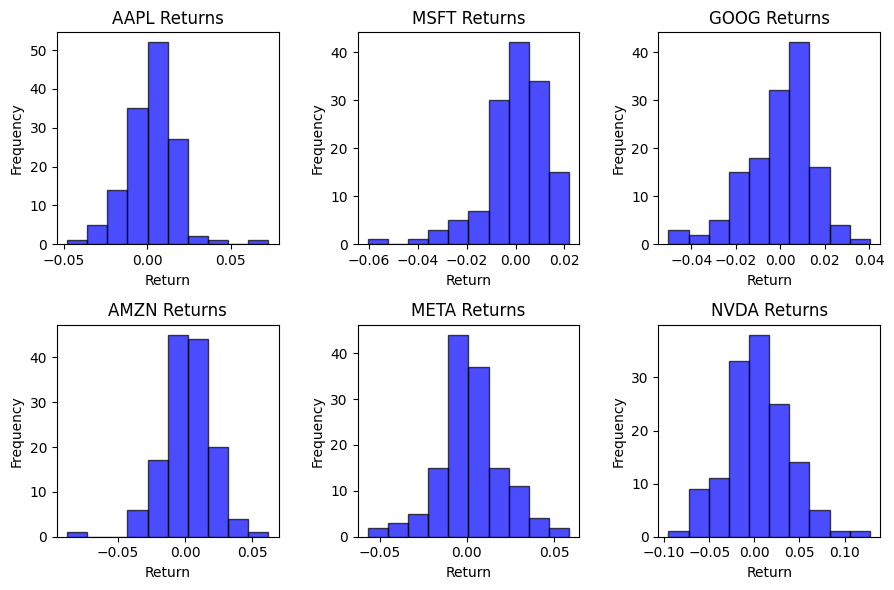

In [6]:
plot_histograms(data=returns, tickers=tech_symbols)

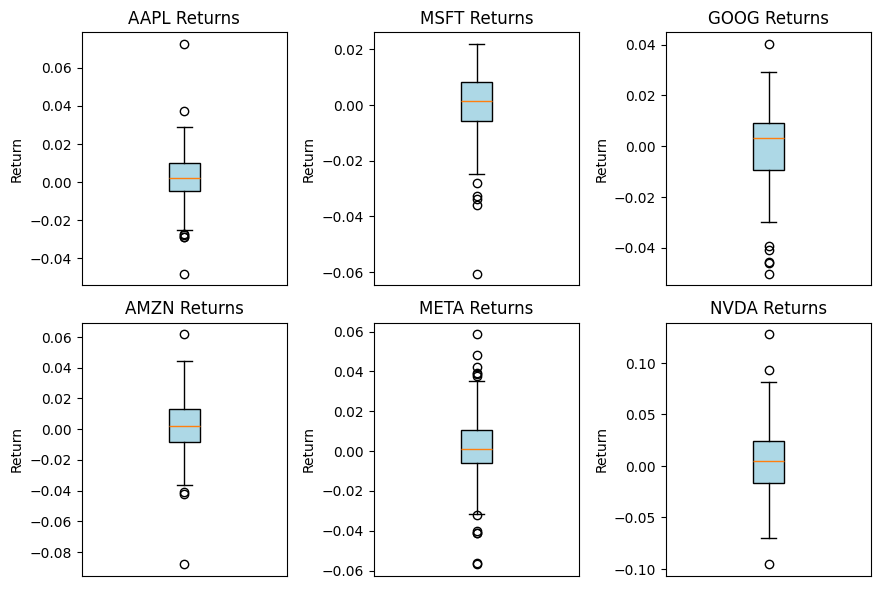

In [7]:
plot_boxplots(data=returns, tickers=tech_symbols)

### Time series analysis:

A time series is a series of observations collected at constant time intervals. Time series analysis helps to understand the trends, patterns, and relationships in the data over time. Here are some common time series analysis techniques:

- **Time series descomposition:** Observe trend, seasonality, and residuals (randomness).
    - <u>Trend</u>: Long-term direction.
    - <u>Seasonality</u>: Repeating patterns at fixed intervals.
    - <u>Residuals or randomness</u>: Unpredictable variations that don't follow trends or patterns.

- **Stationarity:** A time series is stationary if its statistical properties do not change over time. As mentioned before, stationarity is a desired property in data modelling. So, we can estimate the correlation and partial correlation functions and the Augmented Dickey-Fuller (ADF) Test to check that the stock prices are not stationary while the returns are.

- **Trend analysis:** To determinate the direction of a trend, market analysts use the moving averagein as a technical indicator. The two basic forms of moving averages:
    - <u>Simple Moving Average (SMA)</u>: Averages the past observations to calculate the current value.
    - <u>Exponential Moving Average (EMA)</u>: It gives more weight to the most recent price points to make it more responsive to recent data points.

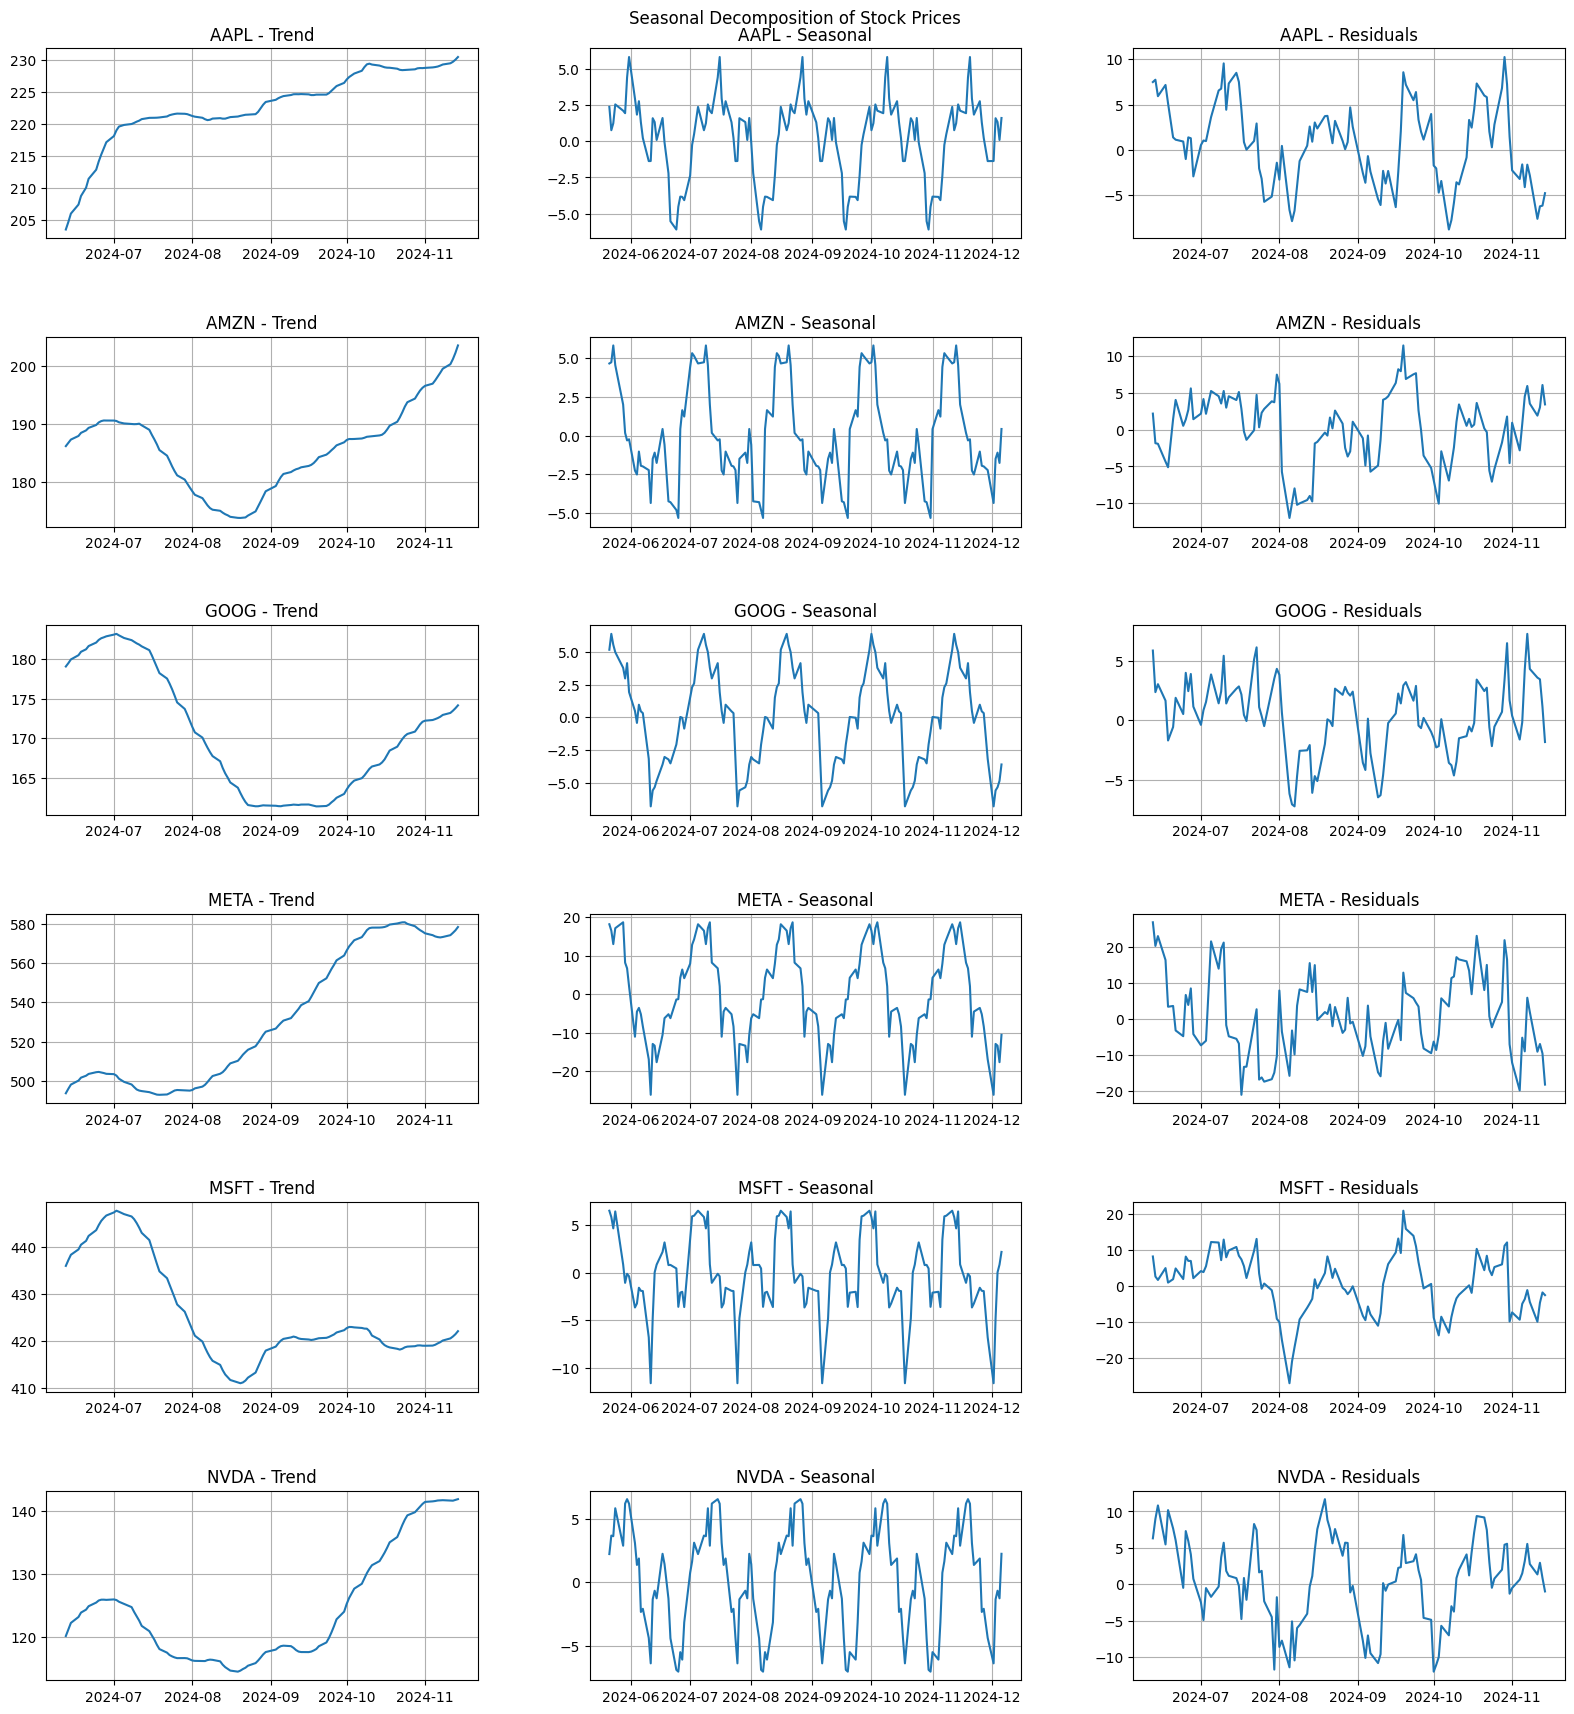

In [8]:
ts_decomposition(data=stocks['Adj Close'], tickers=tech_symbols)

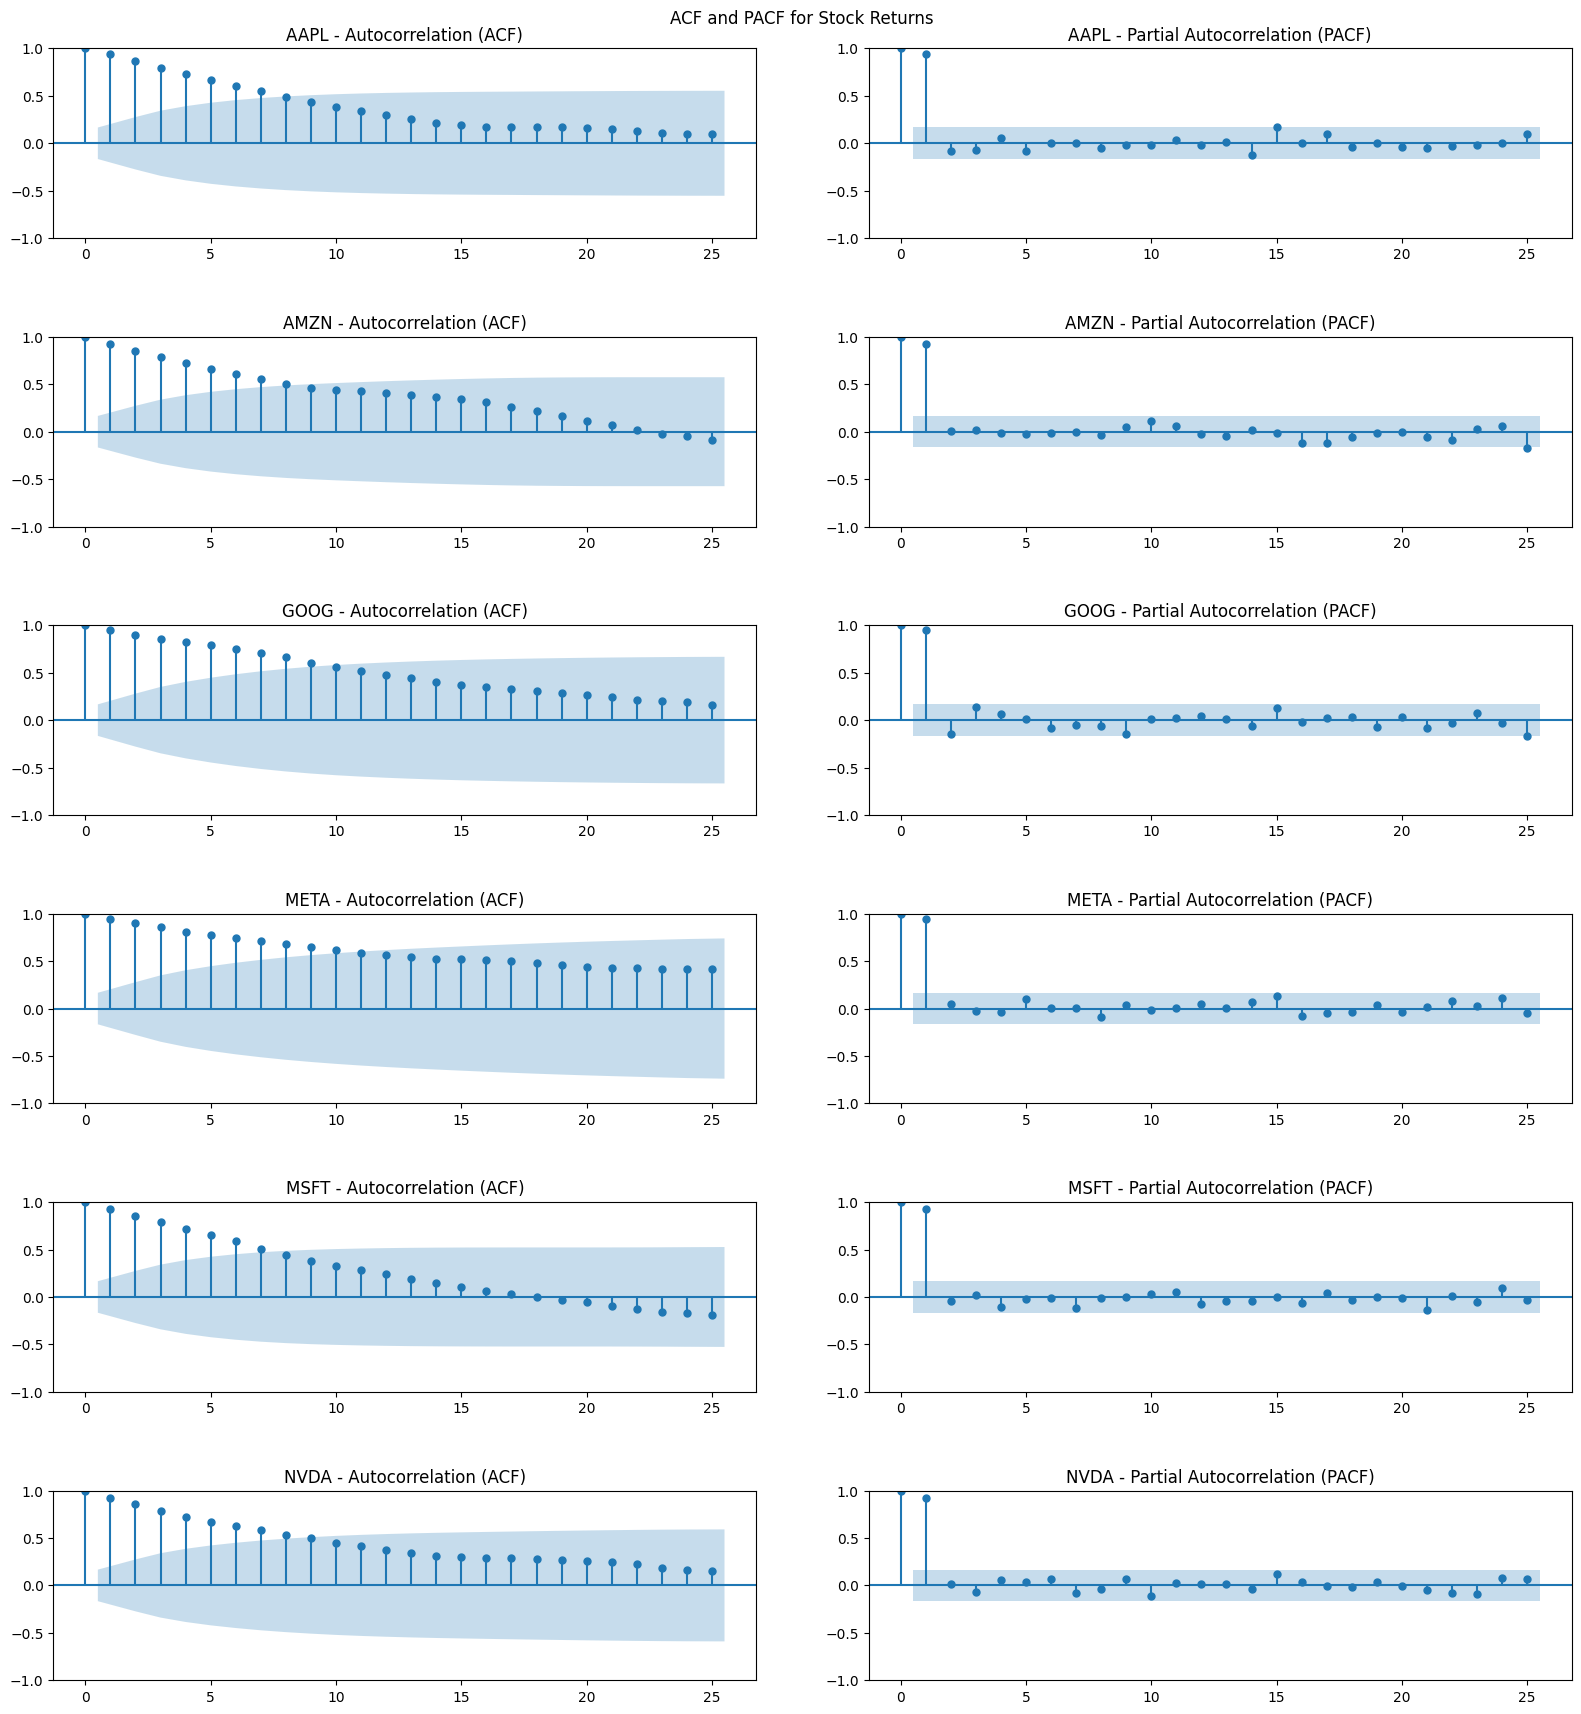

In [9]:
acf_pacf(data=stocks['Adj Close'], tickers=tech_symbols)

In [10]:
# Augmented Dickey-Fuller test
adf_results_price = ts_stationarity(stocks['Adj Close'])
adf_results_returns = ts_stationarity(returns)
adf_results_returns.to_csv('../data/processed/adf_test.csv', sep=';')

print(
    f"Results for Stock Prices:\n{adf_results_price}\n\n"
    + "=" * 79
    + f"\n\nResults for Stock Returns:\n{adf_results_returns}"
)

Results for Stock Prices:
  Ticker  ADF Statistic   p-value Stationary
0   AAPL      -2.156992  0.222223         No
1   AMZN      -0.213789  0.936858         No
2   GOOG      -1.673799  0.444660         No
3   META      -0.973727  0.762726         No
4   MSFT      -1.970873  0.299488         No
5   NVDA      -2.205766  0.204160         No


Results for Stock Returns:
  Ticker  ADF Statistic       p-value Stationary
0   AAPL     -11.200388  2.251521e-20        Yes
1   AMZN     -10.967895  8.016870e-20        Yes
2   GOOG      -8.868801  1.416349e-14        Yes
3   META     -12.141712  1.645241e-22        Yes
4   MSFT     -11.404485  7.507721e-21        Yes
5   NVDA      -7.450310  5.693567e-11        Yes


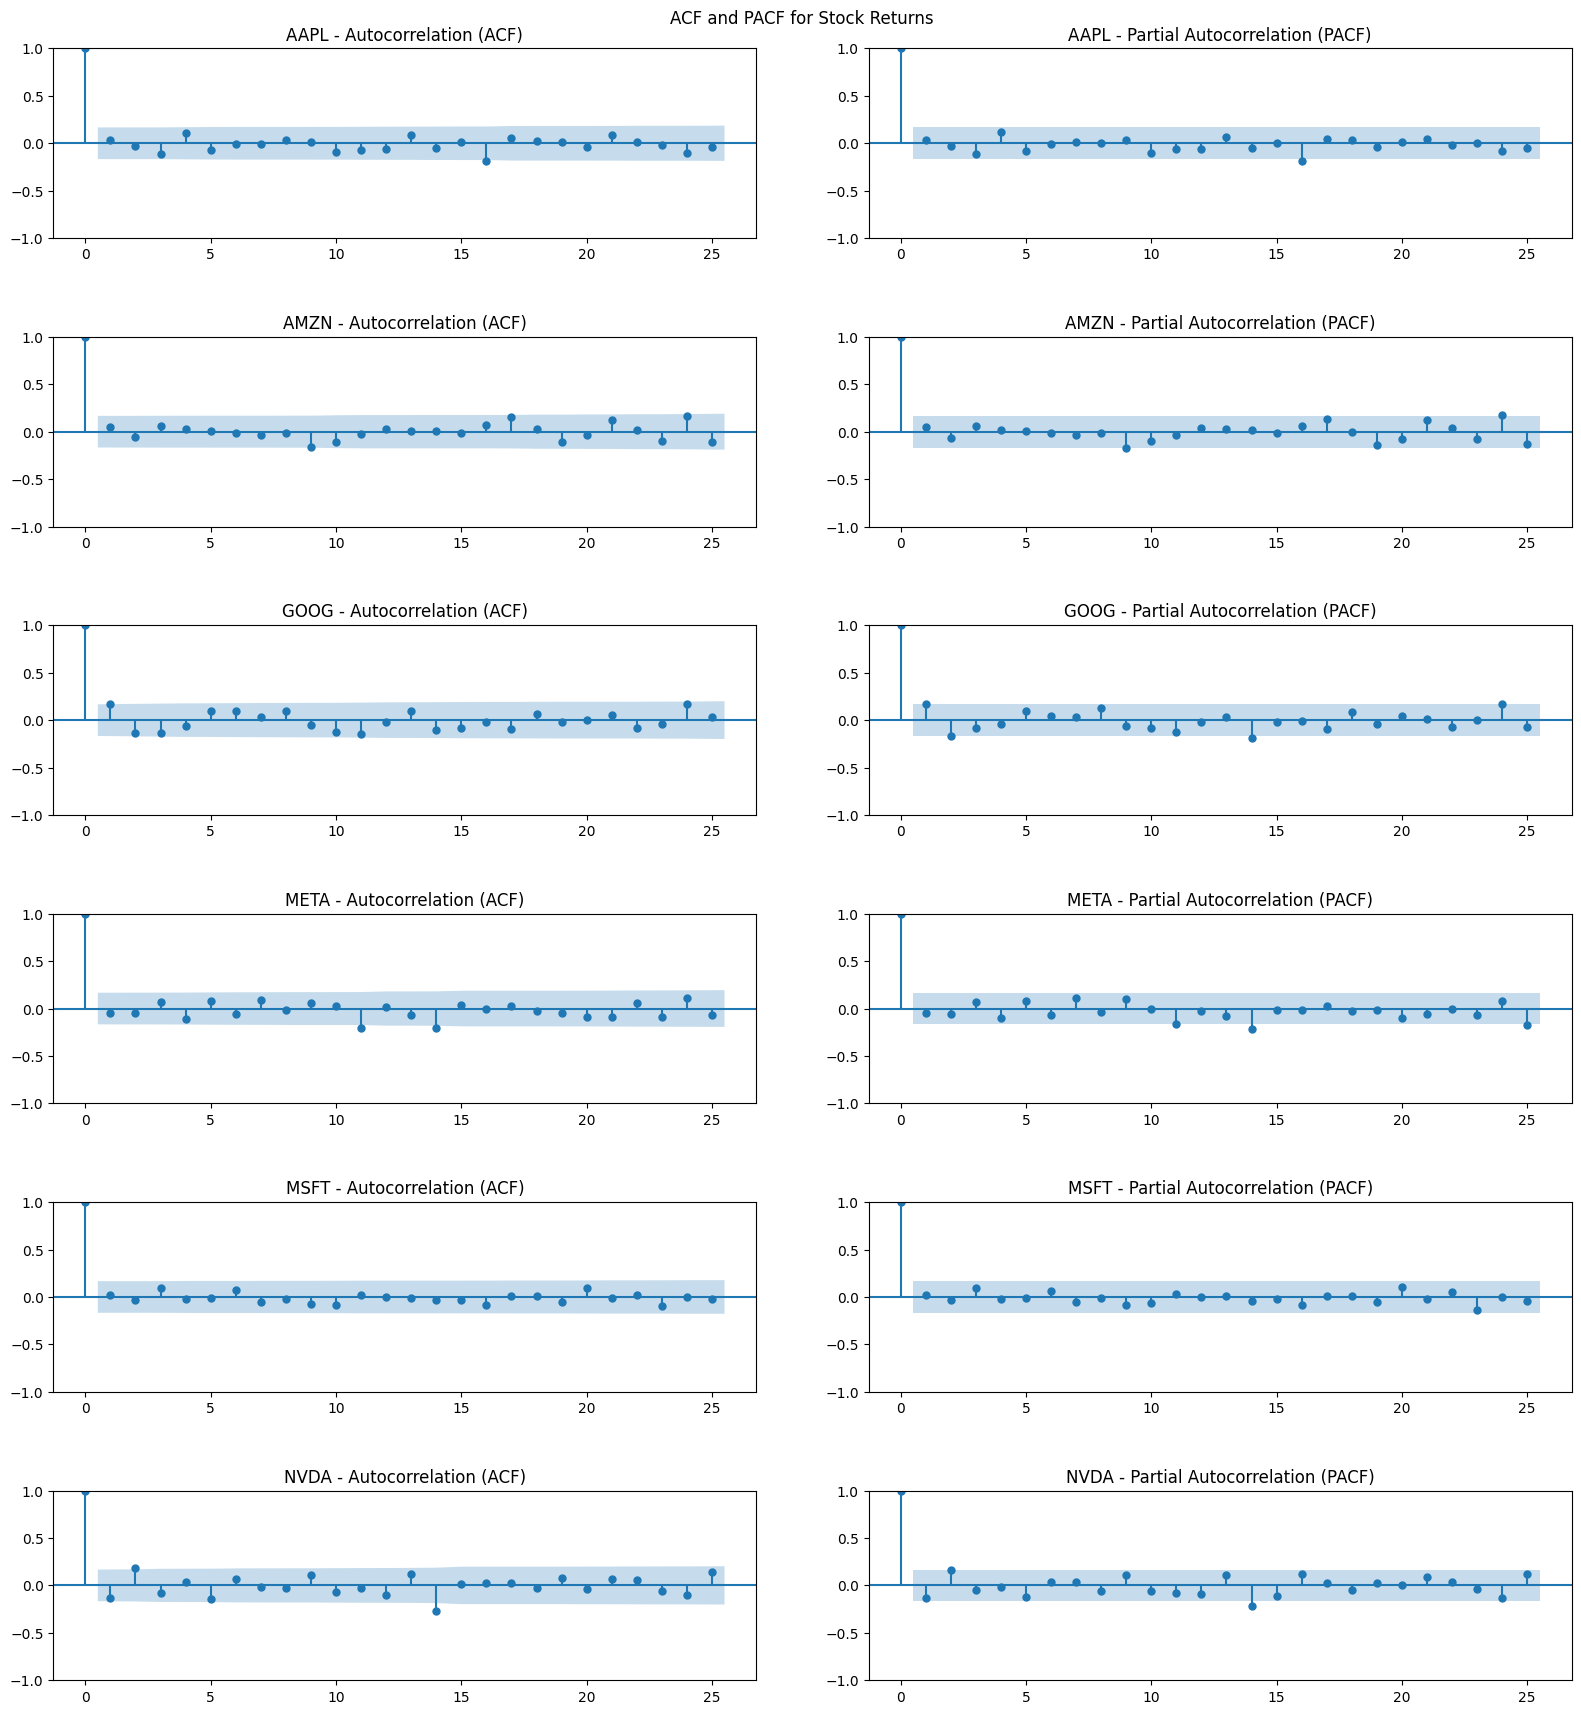

In [11]:
acf_pacf(data=returns, tickers=tech_symbols)

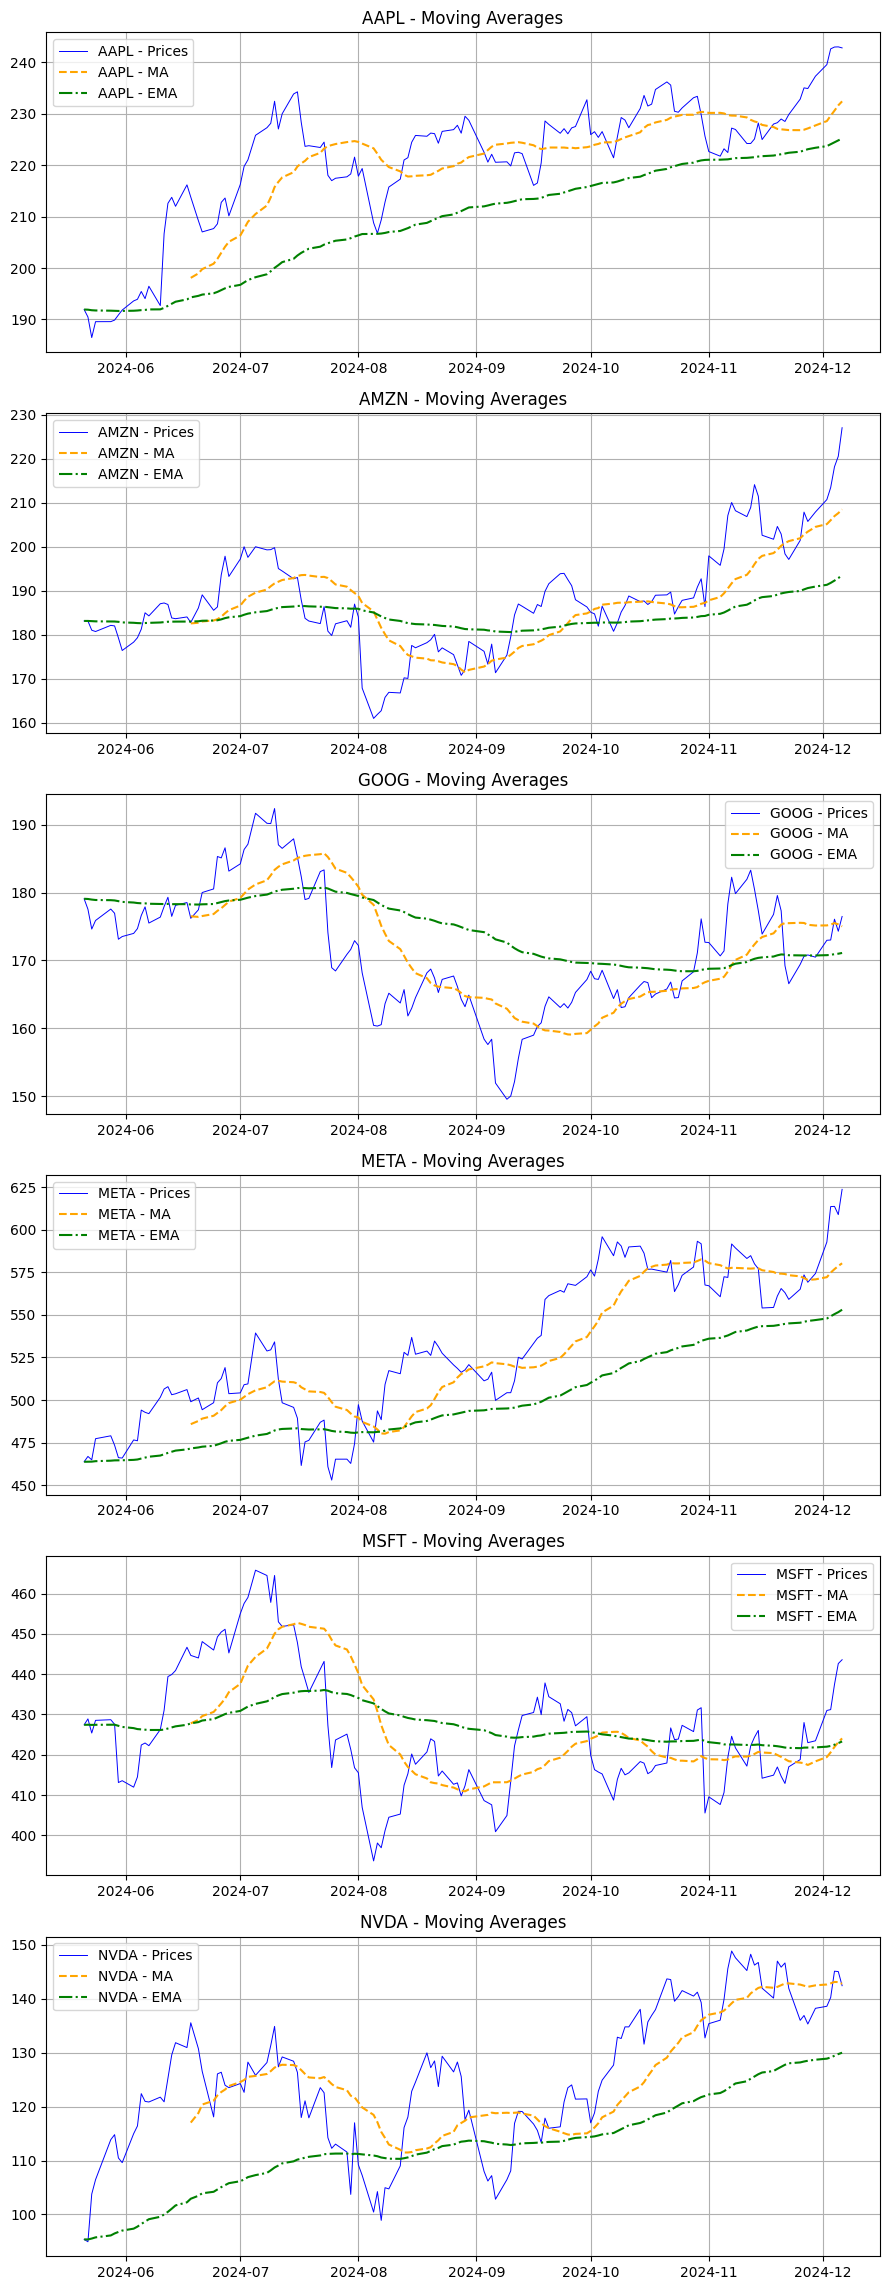

In [12]:
# Trend analysis: simple and exponential moving average
simple_ma = stocks['Adj Close'].rolling(window=20).mean()
simple_ma.to_csv('../data/processed/simple_moving_average.csv', sep=';')

exponential_ma = stocks['Adj Close'].ewm(span=100, adjust=False).mean()
exponential_ma.to_csv('../data/processed/exponential_moving_average.csv', sep=';')

moving_averages(data=stocks['Adj Close'], ma=simple_ma, ema=exponential_ma)

### Risk analysis:

Portfolio risk analysis is the process of identifying and addressing potential risks that could affect a portfolio's performance. The goal is to reduce the impact of events that could negatively affect the portfolio. When you are putting together a portfolio to invest in, some measures of risk that might be considered are:

- **Value at risk (VaR):** The maximum potential loss of a financial asset or portfolio over a specific time period. Calculated as 5.0% quantile.
- **Sharpe Ratio:** The performance of an investment compared to a risk-free asset.
- **Correlation:** Correlation is a key factor in diversification, which is the idea that investing in assets that are not correlated can help reduce risk.


In [13]:
# Value at risk
var_95 = returns.quantile(0.05)

# Sharpe ratio
mean_return = stats['mean']
volatility = stats['std']
risk_free_rate = 0.01

sharpe_ratio = (mean_return - risk_free_rate) / volatility

print(
    f"Value at risk (VaR):\n{var_95}\n\n"
    + "=" * 79
    + f"\n\nSharpe Ratio:\n{sharpe_ratio}"
)

Value at risk (VaR):
Ticker
AAPL   -0.022634
AMZN   -0.026905
GOOG   -0.025201
META   -0.029818
MSFT   -0.022655
NVDA   -0.063618
Name: 0.05, dtype: float64


Sharpe Ratio:
Ticker
AAPL   -0.564524
MSFT   -0.758052
GOOG   -0.652839
AMZN   -0.438217
META   -0.411582
NVDA   -0.186232
dtype: float64


In [14]:
corr_matrix = returns.corr()
print(corr_matrix)

Ticker      AAPL      AMZN      GOOG      META      MSFT      NVDA
Ticker                                                            
AAPL    1.000000  0.334690  0.417001  0.392688  0.508402  0.306398
AMZN    0.334690  1.000000  0.576880  0.516900  0.643373  0.379788
GOOG    0.417001  0.576880  1.000000  0.579025  0.618120  0.372356
META    0.392688  0.516900  0.579025  1.000000  0.617763  0.413642
MSFT    0.508402  0.643373  0.618120  0.617763  1.000000  0.452868
NVDA    0.306398  0.379788  0.372356  0.413642  0.452868  1.000000


**Portfolio example:** In finance, there is a wealth of techniques for building an investment portfolio composed of stock market assets. A dummy case is shown where the consulted stocks will have random weights within the portfolio and how the return and volatility would be estimated.

In [18]:
# Simple portfolio 
weights = np.random.random(len(tech_symbols))
weights = weights / weights.sum()

portfolio_return = sum(weights * mean_return)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))

print(
    f"Portfolio return:\n{portfolio_return}\n\n"
    + "=" * 79
    + f"\n\nPortfolio volatility:\n{portfolio_volatility}"
)

Portfolio return:
0.002185833616036809


Portfolio volatility:
0.01531802644080806
